In [111]:
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv("data/smoker_train.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

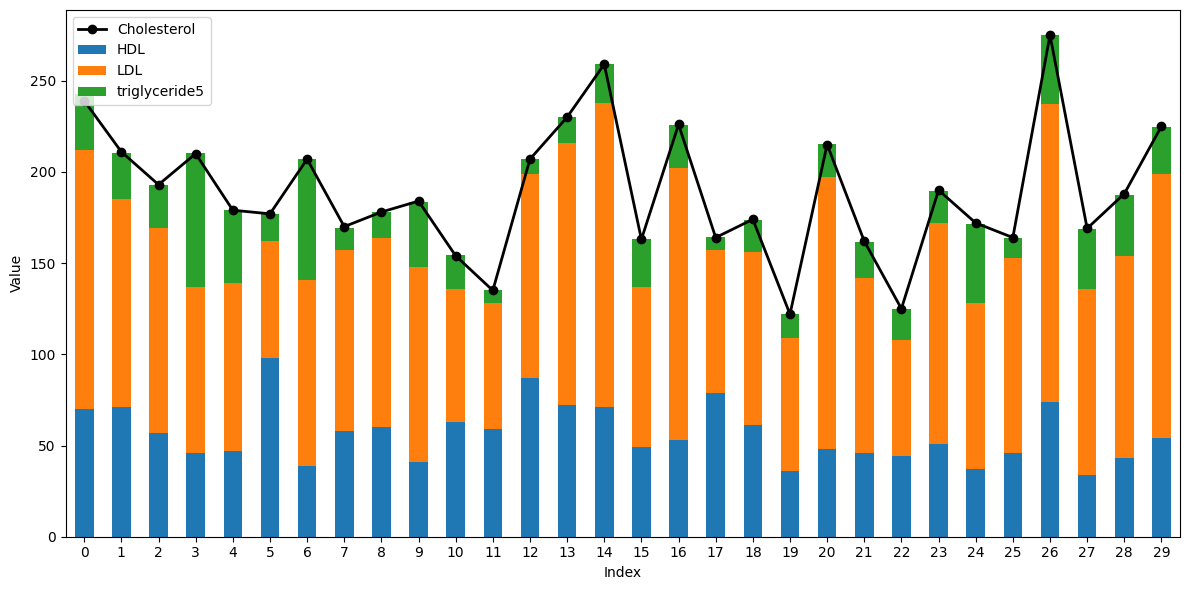

In [112]:
df_train["triglyceride5"] = df_train["triglyceride"] / 5
df_train_subset = df_train[['HDL', 'LDL', 'triglyceride5', 'Cholesterol']].head(30)
ax = df_train_subset[['HDL', 'LDL', 'triglyceride5']].plot(kind='bar', stacked=True, figsize=(12,6))
df_train_subset['Cholesterol'].plot(ax=ax, color='black', marker='o', linewidth=2, label='Cholesterol', secondary_y=False)
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()



==0: 7028
<1 : 36075
<30 : 38845


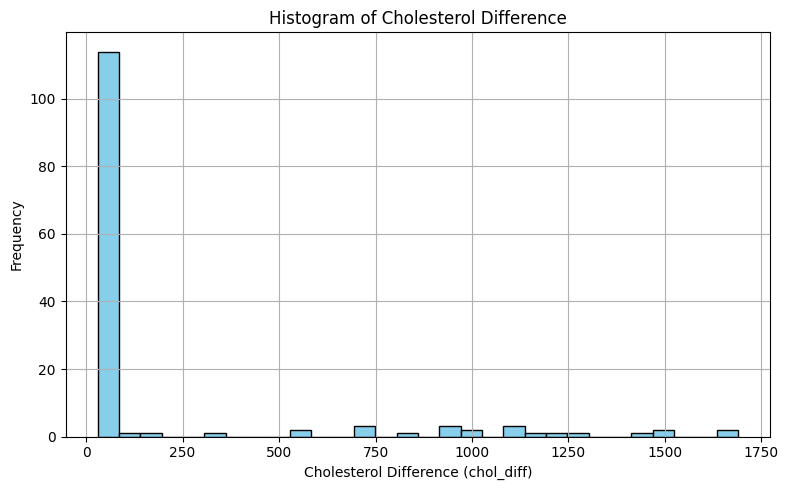

In [113]:
df_train["chol_diff"] = df_train["Cholesterol"]-df_train["HDL"]-df_train["LDL"]-df_train["triglyceride5"]
df_train["chol_diff"] = df_train["chol_diff"].abs()
num_exact_zero = (df_train["chol_diff"] == 0).sum()
num_st_one = (df_train["chol_diff"] < 1).sum()
num_st_30 = (df_train["chol_diff"] < 30).sum()

print(f"==0: {num_exact_zero}")
print(f"<1 : {num_st_one}")
print(f"<30 : {num_st_30}")

df_train = df_train[df_train["chol_diff"] >= 30]

plt.figure(figsize=(8, 5))
df_train["chol_diff"].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Cholesterol Difference (chol_diff)")
plt.ylabel("Frequency")
plt.title("Histogram of Cholesterol Difference")
plt.tight_layout()
plt.show()